<a href="https://colab.research.google.com/github/alyshapm/fods/blob/main/wk8_ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 2: Given the data, do the K-means clustering with k = 2 and initial centroids c1(2.00, 2.00) and c2(5.00, 7.00).

Plot the data in the x and y axis and make the circles to show your final clusters.

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
df = pd.DataFrame(
    {'var_1':[1.0, 1.5, 3.0, 5.0, 3.5, 4.5, 3.5],
     'var_2':[1.0, 2.0, 4.0, 7.0, 5.0, 5.0, 4.5]},
     index=[1, 2, 3, 4, 5, 6, 7])

df.to_csv('df.csv')

In [ ]:
df

,var_1,var_2
1,1.0,1.0
2,1.5,2.0
3,3.0,4.0
4,5.0,7.0
5,3.5,5.0
6,4.5,5.0
7,3.5,4.5


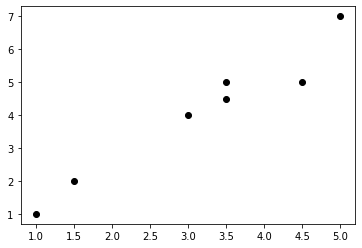

In [ ]:
plt.scatter('var_1', 'var_2', data=df, c="black")
plt.show()

In [ ]:
centroids = pd.DataFrame(
    {'var_1':[2.0, 5.0],
     'var_2':[2.0, 7.0]},
     index=[1, 2])

centroids.to_csv('centroids.csv')
centroids

,var_1,var_2
1,2.0,2.0
2,5.0,7.0


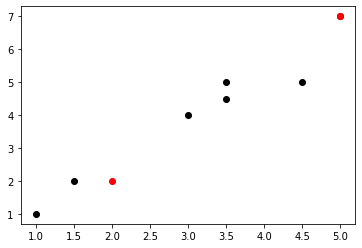

In [ ]:
plt.scatter(df['var_1'],df['var_2'], c='black')
plt.scatter(centroids['var_1'],centroids['var_2'],c='red')
plt.show()

In [ ]:
K = 2
diff = 1
j=0

while(diff!=0):
    XD=df
    i=1
    for index1,row_c in centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["var_2"]-row_d["var_2"])**2
            d2=(row_c["var_1"]-row_d["var_1"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        df[i]=ED
        i=i+1

    C=[]
    for index,row in df.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    df["Cluster"]=C
    centroids_new = df.groupby(["Cluster"]).mean()[["var_1","var_2"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (centroids_new['var_1'] - centroids['var_1']).sum() + (centroids_new['var_2'] - centroids['var_2']).sum()
        print(diff.sum())
    centroids = df.groupby(["Cluster"]).mean()[["var_1","var_2"]]

-1.4583333333333333
-1.9166666666666672
0.0


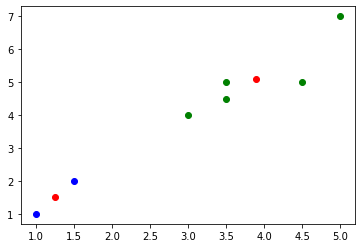

In [ ]:
color=['blue','green','cyan']
for k in range(K):
    new_df=df[df["Cluster"]==k+1]
    plt.scatter(new_df["var_1"], new_df["var_2"],c=color[k])
plt.scatter(centroids["var_1"], centroids["var_2"],c='red')
plt.show()